## Building a Naive Bayes model 

We will consider Iris dataset for this. There are several ways to download and use Iris dataset. In this example, we are loading this dataset from sklearn default datasets. 

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [5]:
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [6]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
print(type(iris))
print(dir(iris))

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [8]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [9]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
df_data = pd.DataFrame(iris.data) 
df_target = pd.DataFrame(iris.target)
df = pd.concat([df_data, df_target], axis=1)

In [11]:
print(df.head())

     0    1    2    3  0
0  5.1  3.5  1.4  0.2  0
1  4.9  3.0  1.4  0.2  0
2  4.7  3.2  1.3  0.2  0
3  4.6  3.1  1.5  0.2  0
4  5.0  3.6  1.4  0.2  0


In [12]:
print(df.shape)

(150, 5)


In [13]:
print(df[45:55])

      0    1    2    3  0
45  4.8  3.0  1.4  0.3  0
46  5.1  3.8  1.6  0.2  0
47  4.6  3.2  1.4  0.2  0
48  5.3  3.7  1.5  0.2  0
49  5.0  3.3  1.4  0.2  0
50  7.0  3.2  4.7  1.4  1
51  6.4  3.2  4.5  1.5  1
52  6.9  3.1  4.9  1.5  1
53  5.5  2.3  4.0  1.3  1
54  6.5  2.8  4.6  1.5  1


In [14]:
df = df.sample(frac=1)

In [15]:
print(df[0:10])

       0    1    2    3  0
47   4.6  3.2  1.4  0.2  0
37   4.9  3.6  1.4  0.1  0
43   5.0  3.5  1.6  0.6  0
22   4.6  3.6  1.0  0.2  0
100  6.3  3.3  6.0  2.5  2
103  6.3  2.9  5.6  1.8  2
13   4.3  3.0  1.1  0.1  0
95   5.7  3.0  4.2  1.2  1
102  7.1  3.0  5.9  2.1  2
94   5.6  2.7  4.2  1.3  1


## Training the model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=1)

In [19]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(x_test)

### Computing Accuracy

In [21]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


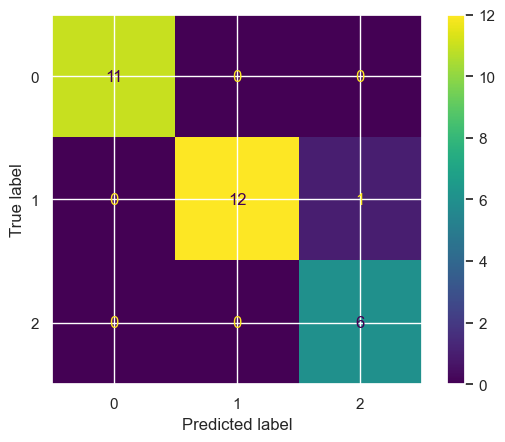

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

In-class activity: use GaussianNB on Titanic dataset and find the accuracy.

We can group SibSp that is passenger traveling with a sibling or a spouse and Parch that is passenger traveling with a child to family_size 

family_size = SibSp + Parch + 1

Use these features: "Age", "Gender", "family_size", "Embarked", "Fare."

In [168]:
df = pd.read_csv('Titanic.csv')

In [170]:
df.describe()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [172]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [174]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_size'],
      dtype='object')

In [176]:
df.shape

(891, 13)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  family_size  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [180]:
df['Gender'].head()

0      male
1    female
2    female
3    female
4      male
Name: Gender, dtype: object

In [182]:
mapping = {'female': 1, 'male': 0}
df['Gender'] = df['Gender'].replace(mapping)
df['Age'] = df['Age'].fillna(df['Age'].mean())

/var/folders/y5/s5xzrx4s54xgf0c6mlxpfvxw0000gn/T/ipykernel_13228/1595006676.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(mapping)


In [184]:
df['Gender'].head()

0    0
1    1
2    1
3    1
4    0
Name: Gender, dtype: int64

In [186]:
data = df[['Age', 'Gender', 'family_size', 'Embarked', 'Fare']]

In [188]:
x_train, x_test, y_train, y_test = train_test_split(data, df['Survived'], test_size = 0.2, random_state=1)

In [190]:
# Train the model using the training sets
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(x_test)

ValueError: could not convert string to float: 'Q'